# SastaTicket Datathon Flight Price Prediction and Analysis

In [228]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
import warnings
import pickle

warnings.filterwarnings('ignore')

In [229]:
# Set maximum number of columns
pd.set_option('display.max_columns', None)

# Importing dataset¶
1.Since data is in form of csv file we have to use pandas read_csv to load the data.

2.After loading it is important to check null values in a column or a row

3.If it is present then following can be done,

Filling NaN values with mean, median and mode using fillna() method
If Less missing values, we can drop it as well

In [230]:
# loading x_test.csv file
df_X_test = pd.read_csv("X_test.csv")

In [231]:
#information about the data
df_X_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4532489 entries, 0 to 4532488
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f1      object 
 1   f2      object 
 2   f3      object 
 3   f4      object 
 4   f5      object 
 5   f6      object 
 6   f7      bool   
 7   f8      float64
 8   f9      int64  
 9   f10     object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 315.5+ MB


In [232]:
#describe about the data
df_X_test.describe()

f8            f9
count  4.532489e+06  4.532489e+06
mean   2.201668e+01  9.891111e-01
std    7.738736e+00  5.539422e-01
min    0.000000e+00  0.000000e+00
25%    2.000000e+01  1.000000e+00
50%    2.000000e+01  1.000000e+00
75%    2.000000e+01  1.000000e+00
max    4.000000e+01  2.000000e+00

In [233]:
#checking total number of rows and columns
print(df_X_test.shape) 
#Initial structure of the data
df_X_test.head()

(4532489, 10)


f1 f2 f3                         f4  \
0  2021-09-01 08:30:19.320999+00:00  x  y  2021-09-08 11:00:00+00:00   
1  2021-09-01 08:30:19.320999+00:00  x  y  2021-09-08 14:00:00+00:00   
2  2021-09-01 08:30:19.320999+00:00  x  y  2021-09-08 05:00:00+00:00   
3  2021-09-01 08:30:20.396761+00:00  x  y  2021-09-08 05:30:00+00:00   
4  2021-09-01 08:30:20.396761+00:00  x  y  2021-09-08 05:30:00+00:00   

                          f5     f6    f7    f8  f9   f10  
0  2021-09-08 12:55:00+00:00   beta  True  40.0   0  b-69  
1  2021-09-08 15:55:00+00:00   beta  True  40.0   0   b-9  
2  2021-09-08 06:55:00+00:00   beta  True  20.0   0   b-1  
3  2021-09-08 07:30:00+00:00  gamma  True  20.0   2   c-2  
4  2021-09-08 07:30:00+00:00  gamma  True  20.0   1   c-2

In [234]:
#finding the null values
df_X_test.isnull().sum()

f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
dtype: int64

In [235]:
# loading y_train.csv file
df_y_train = pd.read_csv("y_train.csv")

In [236]:
#Initial structure of the data
df_y_train.head()

Unnamed: 0   target
0           0   7400.0
1           1   8650.0
2           2   9150.0
3           3  10400.0
4           4   8697.0

In [237]:
#Remove unwanted column
df_y_train.drop(['Unnamed: 0'],axis=1, inplace=True)

In [238]:
#information about the data
df_y_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21776590 entries, 0 to 21776589
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   target  float64
dtypes: float64(1)
memory usage: 166.1 MB


In [239]:
#describe about the data
df_y_train.describe()

target
count  2.177659e+07
mean   1.013705e+04
std    3.447472e+03
min    0.000000e+00
25%    7.796000e+03
50%    9.380000e+03
75%    1.124500e+04
max    3.500000e+04

In [240]:
#checking total number of rows and columns
print(df_y_train.shape) 

(21776590, 1)


In [241]:
#Initial structure of the data
df_y_train.head()

target
0   7400.0
1   8650.0
2   9150.0
3  10400.0
4   8697.0

In [242]:
#finding the null values
df_y_train.isnull().sum()

target    0
dtype: int64

In [243]:
#Read 
df_X_train = pd.read_csv("X_train.csv")

In [244]:
#Initial structure of the data
df_X_train.head(10)

Unnamed: 0                                f1 f2 f3  \
0           0  2020-12-31 09:46:17.463002+00:00  x  y   
1           1  2020-12-31 09:46:17.463002+00:00  x  y   
2           2  2020-12-31 09:46:17.463002+00:00  x  y   
3           3  2020-12-31 09:46:17.463002+00:00  x  y   
4           4  2020-12-31 09:46:18.191119+00:00  x  y   
5           5  2020-12-31 09:46:18.191119+00:00  x  y   
6           6  2020-12-31 09:46:18.191119+00:00  x  y   
7           7  2020-12-31 09:46:18.191119+00:00  x  y   
8           8  2020-12-31 09:46:19.878719+00:00  x  y   
9           9  2020-12-31 09:46:19.878719+00:00  x  y   

                          f4                         f5     f6     f7    f8  \
0  2021-01-10 05:00:00+00:00  2021-01-10 07:00:00+00:00  gamma   True   0.0   
1  2021-01-10 05:00:00+00:00  2021-01-10 07:00:00+00:00  gamma   True  32.0   
2  2021-01-10 11:00:00+00:00  2021-01-10 13:00:00+00:00  gamma   True  32.0   
3  2021-01-10 11:00:00+00:00  2021-01-10 13:00:00+00:00  gamma   True  32.0   
4  2021-01-25 11:00:00+00:00  2021-01-25 12:55:00+00:00   beta  False  20.0   
5  2021-01-25 05:00:00+00:00  2021-01-25 06:55:00+00:00   beta  False  20.0   
6  2021-01-25 14:00:00+00:00  2021-01-25 15:55:00+00:00   beta  False  20.0   
7  2021-01-25 16:00:00+00:00  2021-01-25 17:55:00+00:00   beta  False  20.0   
8  2021-01-25 11:00:00+00:00  2021-01-25 13:00:00+00:00  gamma   True  32.0   
9  2021-01-25 11:00:00+00:00  2021-01-25 13:00:00+00:00  gamma   True  32.0   

   f9   f10  
0   0   c-2  
1   1   c-2  
2   1   c-4  
3   2   c-4  
4   0  b-69  
5   0   b-1  
6   0   b-9  
7   0  b-19  
8   2   c-4  
9   1   c-4

In [245]:
#information about the data
df_X_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21776590 entries, 0 to 21776589
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   f1          object 
 2   f2          object 
 3   f3          object 
 4   f4          object 
 5   f5          object 
 6   f6          object 
 7   f7          bool   
 8   f8          float64
 9   f9          int64  
 10  f10         object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 1.6+ GB


In [246]:
#describe about the data
df_X_train.describe()

Unnamed: 0            f8            f9
count  2.177659e+07  2.177659e+07  2.177659e+07
mean   1.088829e+07  2.258956e+01  9.491727e-01
std    6.286360e+06  8.885366e+00  6.077294e-01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    5.444147e+06  2.000000e+01  1.000000e+00
50%    1.088829e+07  2.000000e+01  1.000000e+00
75%    1.633244e+07  3.200000e+01  1.000000e+00
max    2.177659e+07  4.500000e+01  2.000000e+00

In [254]:
#finding the null values
df_X_train.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
dtype: int64

In [255]:
# Checking row of x and y train data set
df_X_train.shape[0] == df_y_train.shape[0]

True

In [256]:
# Logical names to the columns 
test_columns = ["Ticket Purchase Date Time","Origin","Destination","Departure Date Time",
                    "Arrival Date Time","Airline","Refundable Ticket","Baggage Weight","Baggage Pieces",
                    "Flight Number"]
def assignColumns(df):   

     # Dropif we have extra unused column
    if 'Unnamed: 0' in df:
        df = df.drop(['Unnamed: 0'],axis = 1)
    
    # Giving logical names to the column for better understanding
    df.columns = test_columns
    
    return df;


# Data Cleaning



In [257]:
# defining date time formatter as per data 
dateTimeFormatter = '%Y-%m-%d %H:%M:%S.%f'


In [258]:

def prepareData(df):
    pd.options.mode.chained_assignment = None 
    
    df = assignColumns(df);
    
    # The datatypes of "Ticket Purchase Date Time","Departure Date Time" and "Arrival Date Time" is object.So,firstly we convert it into date and time for proper predicion.
    # dt.day method will extract only day of that date
    # dt.month method will extract only month of that date
    # dt.year method will extract only year of that date
    # dt.hour method will extract only hour of that date
    # dt.minute method will extract only minute of that date    
    
    df[[test_columns[0],test_columns[3],test_columns[4]]] = df[[test_columns[0],test_columns[3],test_columns[4]]].apply(pd.to_datetime, format=dateTimeFormatter)
    #seperating 
    df["Ticket_Purchase_Day"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.day
    df["Ticket_Purchase_Month"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.month
    df["Ticket_Purchase_Year"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.year
    df["Ticket_Purchase_Hour"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.hour
    df["Ticket_Purchase_Minute"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.minute

    df["Departure_Day"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.day
    df["Departure_Month"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.month
    df["Departure_Year"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.year
    df["Departure_Hour"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.hour
    df["Departure_Minute"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.minute
    
    df["Arrival_Day"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.day
    df["Arrival_Month"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.month
    df["Arrival_Year"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.year
    df["Arrival_Hour"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.hour
    df["Arrival_Minute"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.minute

    # Calculating flight duration  by DepartHour and Arrival hours and minutes
    DepartHours = df["Departure_Hour"] + (df["Departure_Minute"]/60)
    ArrivalHours = df["Arrival_Hour"] + (df["Arrival_Minute"]/60)
    
    # Adding flight duration column in dataframe
    df["FlightDuration"] = ArrivalHours - DepartHours
    
    # From "Ticket Purchase Date Time","Departure Date Time" and "Arrival Date Time" features, we extract day,month, year, hour and minute and stored in new columns and drop these columns¶
    df.drop([test_columns[0],test_columns[1],test_columns[2],test_columns[3], test_columns[4]], axis = 1, inplace = True)
    
    # As "Flight Number" is Nominal Categorical data we will perform OneHotEncoding
    FlightNumber = pd.get_dummies(df[test_columns[9]], drop_first= True) 
    
    # Perform label encoding on "Refundable Ticket", "Airline" and  "Baggage Pieces" data
    df.replace({True: 1, False: 0}, inplace = True)
    df.replace({'alpha': 0, 'gamma': 1, "beta":2,"omega":3}, inplace = True)
    df.replace({0: 0, 15:1, 20:2, 32:3, 35:4, 40:5, 45:6}, inplace = True)

    # Concatenate OneHotEncoding data
    df = pd.concat([df, FlightNumber], axis = 1)

    
    # Drop "Flight Number" as new OneHotEncoding column is already added 
    df.drop([test_columns[9]], axis = 1, inplace = True)

    # return clean dataframe
    return df


In [259]:
# defining number of row to perform data training
no_rows = 10000; 

In [261]:
df_X_train.shape

(21776590, 11)

In [262]:
df_X_train_analysis = df_X_train.head(no_rows)
df_X_train_analysis = assignColumns(df_X_train_analysis)
# Adding price column in train dataset
df_X_train_analysis['Price'] = df_y_train['target'] 

# Count of flights with different Airlines

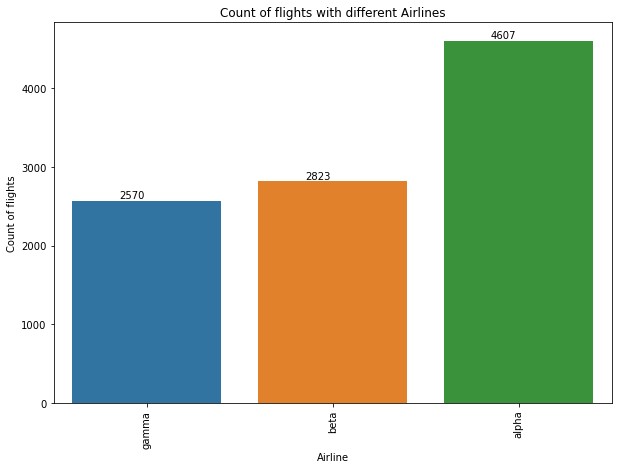

In [263]:
plt.figure(figsize = (10, 7))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = df_X_train_analysis)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

# Group by Airline

In [264]:
df_X_train_analysis.groupby('Airline').sum()


Refundable Ticket  Baggage Weight  Baggage Pieces       Price
Airline                                                               
alpha                 4607         46460.0            2323  45942068.0
beta                     0         77120.0               0  27948956.0
gamma                 2570         62464.0            2619  23592640.0

# Airline vs Price

In [265]:
fig = px.histogram(df_X_train_analysis, 
                   x='Price', 
                   marginal='box', 
                   color='Airline', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Airline vs Price')
fig.update_layout(bargap=0.1)
fig.show()

# Flight Number vs Price

<AxesSubplot:xlabel='Flight Number', ylabel='Price'>

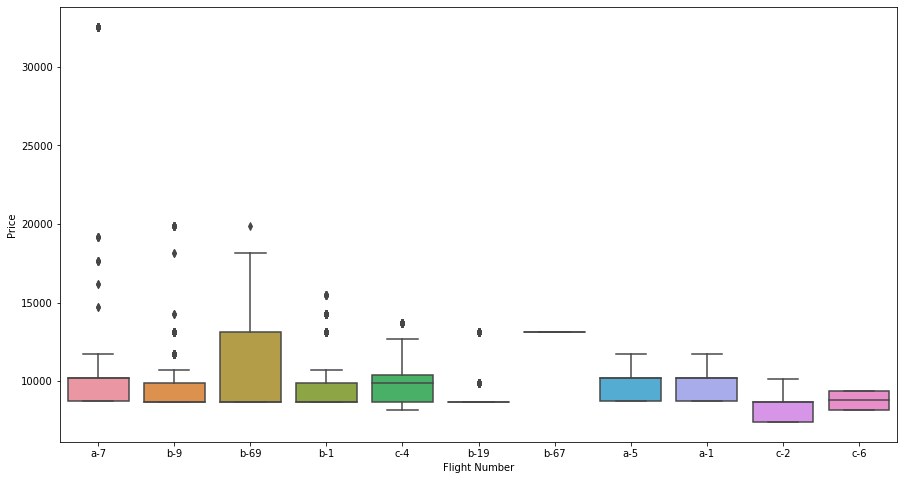

In [266]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Flight Number',y='Price',data=df_X_train_analysis.sort_values('Price',ascending=False))

# Airline, Flight Number and Price visualization with 3D view¶


In [267]:
fig = px.scatter_3d(df_X_train_analysis, x='Airline', y='Flight Number', z='Price')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [268]:

df_X_train_final = prepareData(df_X_train.head(no_rows))


In [269]:
df_X_train_final.head()

Airline  Refundable Ticket  Baggage Weight  Baggage Pieces  \
0        1                  1             0.0               0   
1        1                  1             3.0               1   
2        1                  1             3.0               1   
3        1                  1             3.0               2   
4        2                  0             2.0               0   

   Ticket_Purchase_Day  Ticket_Purchase_Month  Ticket_Purchase_Year  \
0                   31                     12                  2020   
1                   31                     12                  2020   
2                   31                     12                  2020   
3                   31                     12                  2020   
4                   31                     12                  2020   

   Ticket_Purchase_Hour  Ticket_Purchase_Minute  Departure_Day  \
0                     9                      46             10   
1                     9                      46             10   
2                     9                      46             10   
3                     9                      46             10   
4                     9                      46             25   

   Departure_Month  Departure_Year  Departure_Hour  Departure_Minute  \
0                1            2021               5                 0   
1                1            2021               5                 0   
2                1            2021              11                 0   
3                1            2021              11                 0   
4                1            2021              11                 0   

   Arrival_Day  Arrival_Month  Arrival_Year  Arrival_Hour  Arrival_Minute  \
0           10              1          2021             7               0   
1           10              1          2021             7               0   
2           10              1          2021            13               0   
3           10              1          2021            13               0   
4           25              1          2021            12              55   

   FlightDuration  a-5  a-7  b-1  b-19  b-67  b-69  b-9  c-2  c-4  c-6  
0        2.000000    0    0    0     0     0     0    0    1    0    0  
1        2.000000    0    0    0     0     0     0    0    1    0    0  
2        2.000000    0    0    0     0     0     0    0    0    1    0  
3        2.000000    0    0    0     0     0     0    0    0    1    0  
4        1.916667    0    0    0     0     0     1    0    0    0    0

In [270]:
df_X_test.shape
df_X_test.columns
df_X_test_final = prepareData(df_X_test.head(no_rows))


In [271]:
# Adding price column in train dataset
df_X_train['Price'] = df_y_train['target'] 
df_X_train_final['Price'] = df_y_train['target'] 

In [272]:
df_X_test_final.head()

Airline  Refundable Ticket  Baggage Weight  Baggage Pieces  \
0        2                  1             5.0               0   
1        2                  1             5.0               0   
2        2                  1             2.0               0   
3        1                  1             2.0               2   
4        1                  1             2.0               1   

   Ticket_Purchase_Day  Ticket_Purchase_Month  Ticket_Purchase_Year  \
0                    1                      9                  2021   
1                    1                      9                  2021   
2                    1                      9                  2021   
3                    1                      9                  2021   
4                    1                      9                  2021   

   Ticket_Purchase_Hour  Ticket_Purchase_Minute  Departure_Day  \
0                     8                      30              8   
1                     8                      30              8   
2                     8                      30              8   
3                     8                      30              8   
4                     8                      30              8   

   Departure_Month  Departure_Year  Departure_Hour  Departure_Minute  \
0                9            2021              11                 0   
1                9            2021              14                 0   
2                9            2021               5                 0   
3                9            2021               5                30   
4                9            2021               5                30   

   Arrival_Day  Arrival_Month  Arrival_Year  Arrival_Hour  Arrival_Minute  \
0            8              9          2021            12              55   
1            8              9          2021             1              55   
2            8              9          2021             6              55   
3            8              9          2021             7              30   
4            8              9          2021             7              30   

   FlightDuration  a-23  a-5  a-7  a-9  b-1  b-19  b-319  b-67  b-69  b-73  \
0        1.916667     0    0    0    0    0     0      0     0     1     0   
1        1.916667     0    0    0    0    0     0      0     0     0     0   
2        1.916667     0    0    0    0    1     0      0     0     0     0   
3        2.000000     0    0    0    0    0     0      0     0     0     0   
4        2.000000     0    0    0    0    0     0      0     0     0     0   

   b-9  c-2  c-4  c-6  d-1  d-3  d-5  
0    0    0    0    0    0    0    0  
1    1    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    1    0    0    0    0    0  
4    0    1    0    0    0    0    0

In [273]:
df_X_test_final.shape

(10000, 37)

# Finding corelation 

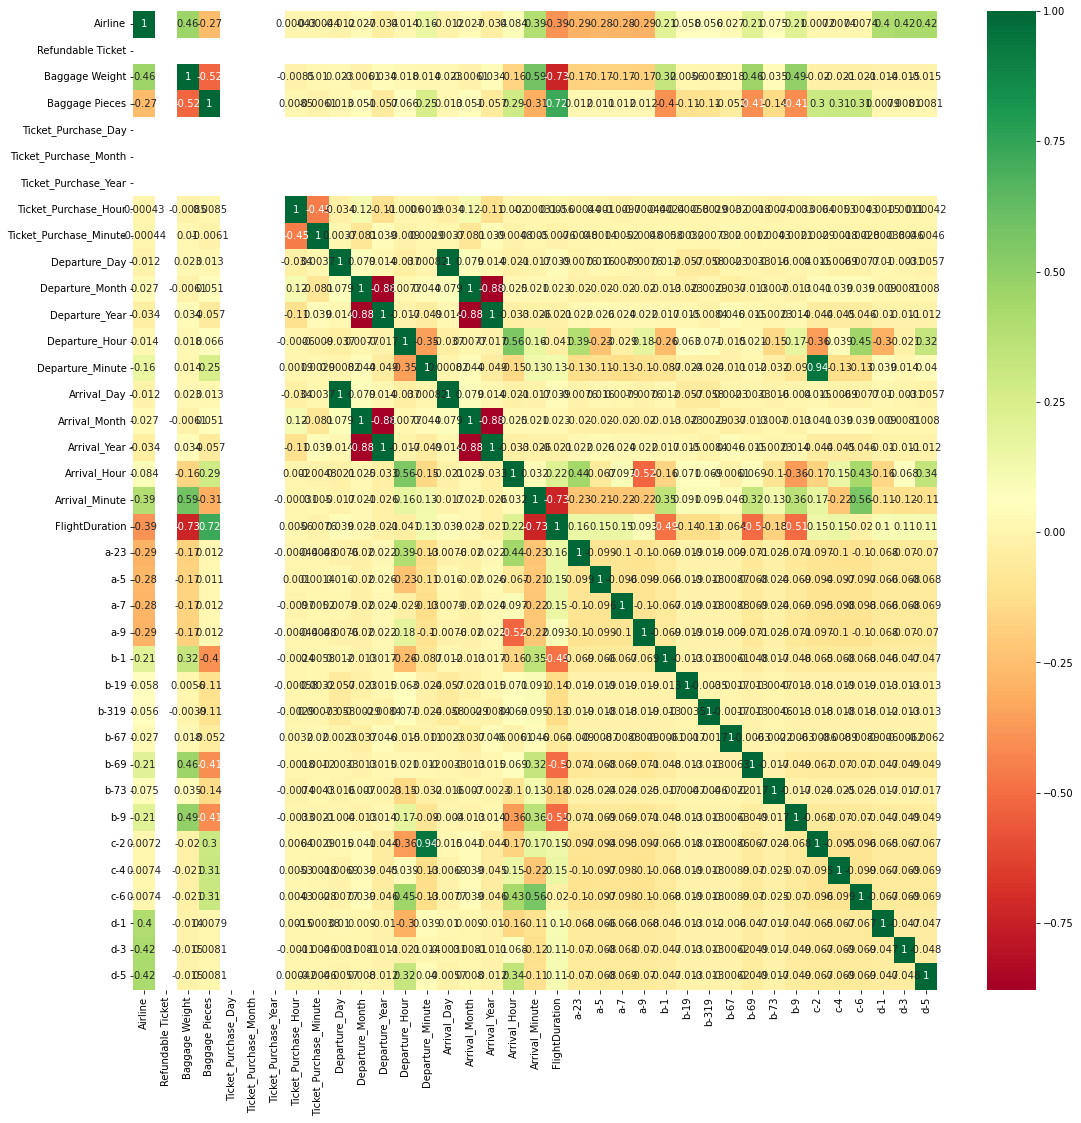

In [274]:
plt.figure(figsize=(18,18))
sns.heatmap(df_X_test_final.corr(),annot=True,cmap='RdYlGn')
plt.show()

# FlightDuration vs Price visualization with scatter plot¶


In [275]:
fig = px.scatter(df_X_train_final, 
                 x='FlightDuration', 
                 y='Price', 
                 #color='Source', 
                 opacity=0.8, 
                 hover_data=['Airline'], 
                 title='Flight Duration vs. Price')
fig.update_traces(marker_size=5)
fig.show()

# Frequency of Flight based on Arrival and Departure  day and month

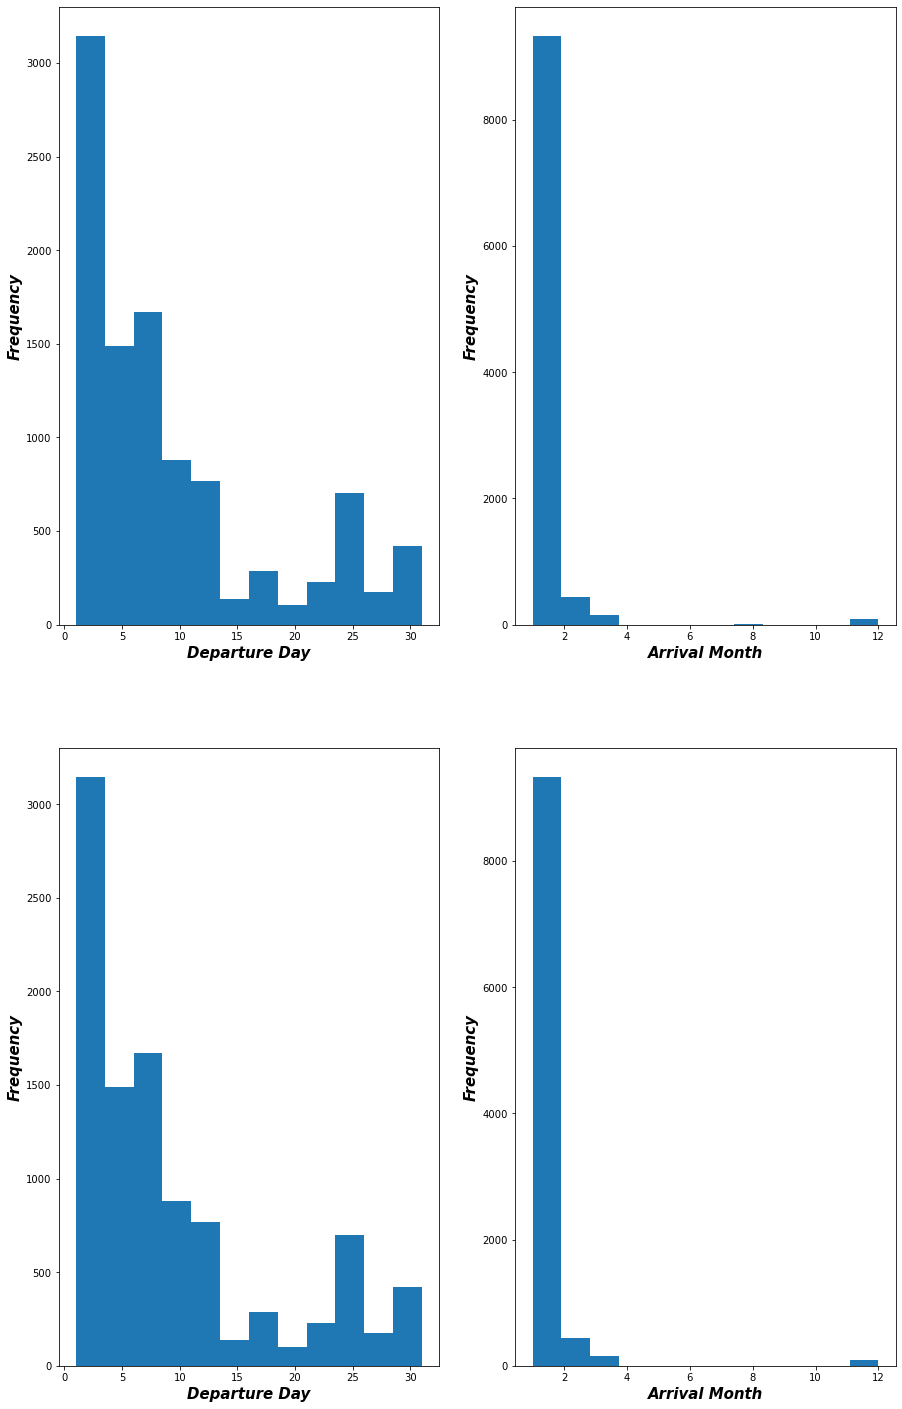

In [276]:
fig = plt.figure(figsize=(15,25))
plt.subplot(221) 
plt.hist(df_X_train_final['Arrival_Day'] , bins=12)
plt.xlabel('Departure Day',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')

plt.subplot(222) 
plt.hist(df_X_train_final['Arrival_Month'] , bins=12)
plt.xlabel('Arrival Month',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')

plt.subplot(223) 
plt.hist(df_X_train_final['Departure_Day'] , bins=12)
plt.xlabel('Departure Day',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')


plt.subplot(224) 
plt.hist(df_X_train_final['Departure_Month'] , bins=12)
plt.xlabel('Arrival Month',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')


plt.show()

Our observations:

- Most flights are in the month of Janruary
- Most flights are in 1st week of the all months.

# Day Expand and Cost visualization with Animation¶


In [278]:
px.scatter(data_frame=df_X_train_final,
                x= 'Price',
                y='Departure_Day',
                size='Departure_Month',
                color='FlightDuration',
                title= 'Day Expand and Cost',
                labels= {'Price': 'Cost',
                         'Departure_Day': 'Day Expand'},
                log_x= True,
                range_y= [0,400],
                hover_name= 'Airline',
                animation_frame='Price',
                height= 400,
                size_max=40)

# Feature Selection using Extra Trees Regressor¶


In [279]:
df_X_train_final.columns

Index(['Airline', 'Refundable Ticket', 'Baggage Weight', 'Baggage Pieces',
       'Ticket_Purchase_Day', 'Ticket_Purchase_Month', 'Ticket_Purchase_Year',
       'Ticket_Purchase_Hour', 'Ticket_Purchase_Minute', 'Departure_Day',
       'Departure_Month', 'Departure_Year', 'Departure_Hour',
       'Departure_Minute', 'Arrival_Day', 'Arrival_Month', 'Arrival_Year',
       'Arrival_Hour', 'Arrival_Minute', 'FlightDuration', 'a-5', 'a-7', 'b-1',
       'b-19', 'b-67', 'b-69', 'b-9', 'c-2', 'c-4', 'c-6', 'Price'],
      dtype='object')

In [280]:
X = df_X_train_final.loc[:,df_X_train_final.columns]
X = X.iloc[:, :-1]
X.head()

Airline  Refundable Ticket  Baggage Weight  Baggage Pieces  \
0        1                  1             0.0               0   
1        1                  1             3.0               1   
2        1                  1             3.0               1   
3        1                  1             3.0               2   
4        2                  0             2.0               0   

   Ticket_Purchase_Day  Ticket_Purchase_Month  Ticket_Purchase_Year  \
0                   31                     12                  2020   
1                   31                     12                  2020   
2                   31                     12                  2020   
3                   31                     12                  2020   
4                   31                     12                  2020   

   Ticket_Purchase_Hour  Ticket_Purchase_Minute  Departure_Day  \
0                     9                      46             10   
1                     9                      46             10   
2                     9                      46             10   
3                     9                      46             10   
4                     9                      46             25   

   Departure_Month  Departure_Year  Departure_Hour  Departure_Minute  \
0                1            2021               5                 0   
1                1            2021               5                 0   
2                1            2021              11                 0   
3                1            2021              11                 0   
4                1            2021              11                 0   

   Arrival_Day  Arrival_Month  Arrival_Year  Arrival_Hour  Arrival_Minute  \
0           10              1          2021             7               0   
1           10              1          2021             7               0   
2           10              1          2021            13               0   
3           10              1          2021            13               0   
4           25              1          2021            12              55   

   FlightDuration  a-5  a-7  b-1  b-19  b-67  b-69  b-9  c-2  c-4  c-6  
0        2.000000    0    0    0     0     0     0    0    1    0    0  
1        2.000000    0    0    0     0     0     0    0    1    0    0  
2        2.000000    0    0    0     0     0     0    0    0    1    0  
3        2.000000    0    0    0     0     0     0    0    0    1    0  
4        1.916667    0    0    0     0     0     1    0    0    0    0

In [281]:
X.nunique()

Airline                    3
Refundable Ticket          2
Baggage Weight             4
Baggage Pieces             3
Ticket_Purchase_Day        1
Ticket_Purchase_Month      1
Ticket_Purchase_Year       1
Ticket_Purchase_Hour       6
Ticket_Purchase_Minute    54
Departure_Day             29
Departure_Month            5
Departure_Year             2
Departure_Hour             7
Departure_Minute           3
Arrival_Day               29
Arrival_Month              5
Arrival_Year               2
Arrival_Hour               8
Arrival_Minute             6
FlightDuration             8
a-5                        2
a-7                        2
b-1                        2
b-19                       2
b-67                       2
b-69                       2
b-9                        2
c-2                        2
c-4                        2
c-6                        2
dtype: int64

In [282]:
y = df_y_train.head(no_rows)
y.head()

target
0   7400.0
1   8650.0
2   9150.0
3  10400.0
4   8697.0

In [283]:
models = [
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['ExtraTreeRegressor : ', ExtraTreeRegressor()],
          ['XGBRegressor : ', XGBRegressor()],
]

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 192)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 30), (2000, 30), (8000, 1), (2000, 1))

In [285]:
X_train.head()

Airline  Refundable Ticket  Baggage Weight  Baggage Pieces  \
1410        0                  1             2.0               1   
4327        0                  1             0.0               0   
2084        2                  0             2.0               0   
1121        0                  1             0.0               0   
9171        2                  0             5.0               0   

      Ticket_Purchase_Day  Ticket_Purchase_Month  Ticket_Purchase_Year  \
1410                   31                     12                  2020   
4327                   31                     12                  2020   
2084                   31                     12                  2020   
1121                   31                     12                  2020   
9171                   31                     12                  2020   

      Ticket_Purchase_Hour  Ticket_Purchase_Minute  Departure_Day  \
1410                    10                      26              6   
4327                    11                      50              3   
2084                    10                      51              3   
1121                    10                      17             16   
9171                    14                      24              1   

      Departure_Month  Departure_Year  Departure_Hour  Departure_Minute  \
1410                1            2021              16                 0   
4327                1            2021               5                 1   
2084                1            2021              16                 0   
1121                1            2021               5                 1   
9171                1            2021              14                 0   

      Arrival_Day  Arrival_Month  Arrival_Year  Arrival_Hour  Arrival_Minute  \
1410            6              1          2021            18              10   
4327            3              1          2021             7              25   
2084            3              1          2021            17              55   
1121           16              1          2021             7              25   
9171            1              1          2021             1              55   

      FlightDuration  a-5  a-7  b-1  b-19  b-67  b-69  b-9  c-2  c-4  c-6  
1410        2.166667    0    1    0     0     0     0    0    0    0    0  
4327        2.166667    0    0    0     0     0     0    0    0    0    0  
2084        1.916667    0    0    0     1     0     0    0    0    0    0  
1121        2.166667    0    0    0     0     0     0    0    0    0    0  
9171        1.916667    0    0    0     0     0     0    1    0    0    0

In [286]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("prediction:"+name, metrics.r2_score(y_test, predictions))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print()

prediction:KNeighborsRegressor :  0.7584665112885746
KNeighborsRegressor :  891.5528339924673
MAE: 504.41480000000007
MSE: 794866.4558

prediction:DecisionTreeRegressor :  0.9288200462812882
DecisionTreeRegressor :  483.99096931141185
MAE: 93.43725
MSE: 234247.258375

prediction:RandomForestRegressor :  0.954822016262961
RandomForestRegressor :  385.5865087756934
MAE: 105.91556760714285
MSE: 148676.9557498279

prediction:GradientBoostingRegressor :  0.9113715091948963
GradientBoostingRegressor :  540.0638209065628
MAE: 284.9806247407394
MSE: 291668.93065219594

prediction:ExtraTreeRegressor :  0.9588507497356461
ExtraTreeRegressor :  367.9928419820147
MAE: 82.627
MSE: 135418.73175

prediction:XGBRegressor :  0.9481753096451687
XGBRegressor :  412.9778563325213
MAE: 120.73038232421875
MSE: 170550.70982100462



In [287]:
#from sklearn.model_selection import StratifiedKFold
#i=1 
#kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
#answer = []
#for training,testing in kf.split(X,y): 
#    x_train,x_test = X.iloc[training] , X.iloc[testing]
#    y_train,y_test = y.iloc[training] , y.iloc[testing]
#    model = RandomForestRegressor(max_depth=13, n_estimators=141, random_state=1)
#    model.fit(x_train,y_train)
#    y_pred = model.predict(x_test)
#    score = metrics.r2_score(y_test,y_pred)
#    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
#    col = 'itter{}'.format(i)
#    i = i+1
#    answer.append(score)

In [288]:
#answer

In [289]:
random_grid ={
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }

In [290]:
algorithms = {
    
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [291]:
X_train.shape,y_train.shape

((8000, 30), (8000, 1))

In [292]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(scoring="neg_mean_squared_error",estimator = mp['model'], param_distributions = mp['param'], cv = 5, n_jobs=-1, verbose=2)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_,
        'estimator' : rs.best_estimator_
    }) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
CrossFold_df = pd.DataFrame(score, columns=['model', 'score', 'params','estimator'])
CrossFold_df

# Save Model for future use

In [ ]:
# save the model to disk
filename = 'finalized_models.sav'
pickle.dump(model, open(filename, 'wb'))



In [ ]:

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)